<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [38]:
!pip install wget
import wget

In [39]:
file = wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite")

Connect to the database.


In [40]:
import sqlite3
conn = sqlite3.connect(file) # open a database connection

Import pandas module.


In [41]:
import pandas as pd
%load_ext sql
from matplotlib import pyplot as plt

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Demo: How to run an sql query


In [52]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [43]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [53]:
#create new database on LanguageDesireNextYear
table_name1 = 'LanguageDesireNextYear'
QUERY="""
SELECT sql
FROM sqlite_master
WHERE name='{}'
""".format(table_name1)

# create the query
QUERY = """
SELECT LanguageDesireNextYear, Count(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""


#read the query into the dataframe
df4 = pd.read_sql_query(QUERY,conn)
print(df4)

  LanguageDesireNextYear  Count
0             JavaScript   6630
1               HTML/CSS   5328
2                 Python   5239
3                    SQL   5012
4             TypeScript   4088


In [54]:
#create new database on LanguageDesireNextYear
table_name2 = 'DatabaseWorkedWith'
QUERY="""
SELECT sql
FROM sqlite_master
WHERE name='{}'
""".format(table_name2)

# create the query
QUERY = """
SELECT DatabaseWorkedWith, Count(*) as Count
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY Count DESC
LIMIT 10
"""


#read the query into the dataframe
df5 = pd.read_sql_query(QUERY,conn)
print(df5)

     DatabaseWorkedWith  Count
0                 MySQL   5469
1  Microsoft SQL Server   4110
2            PostgreSQL   4097
3                SQLite   3248
4               MongoDB   3016
5                 Redis   2508
6         Elasticsearch   1954
7                Oracle   1744
8               MariaDB   1709
9              Firebase   1314


In [55]:
# create the query
QUERY = """
SELECT DatabaseWorkedWith, Respondent
FROM DatabaseWorkedWith
"""

df6 = pd.read_sql_query(QUERY, conn)
df6 = df6.drop_duplicates(subset=['Respondent'], inplace=False, keep=False)
df6['DatabaseWorkedWith'].value_counts()
# 474 respondents work with only MySQL

DatabaseWorkedWith
Microsoft SQL Server    845
MySQL                   474
PostgreSQL              351
SQLite                  192
MongoDB                 170
Oracle                  162
Other(s):                94
Firebase                 90
MariaDB                  44
DynamoDB                 28
Elasticsearch            27
Redis                    20
Cassandra                10
Couchbase                 8
Name: count, dtype: int64

In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [10]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [11]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


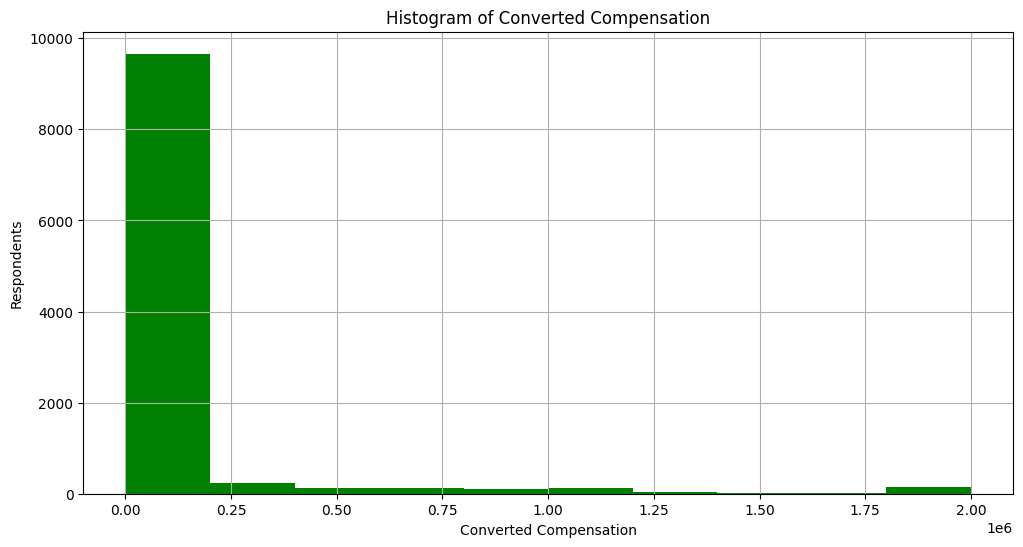

In [15]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.hist(figsize=(12,6), column='ConvertedComp', color='green')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Respondents')
plt.show()



### Box Plots


Plot a box plot of `Age.`


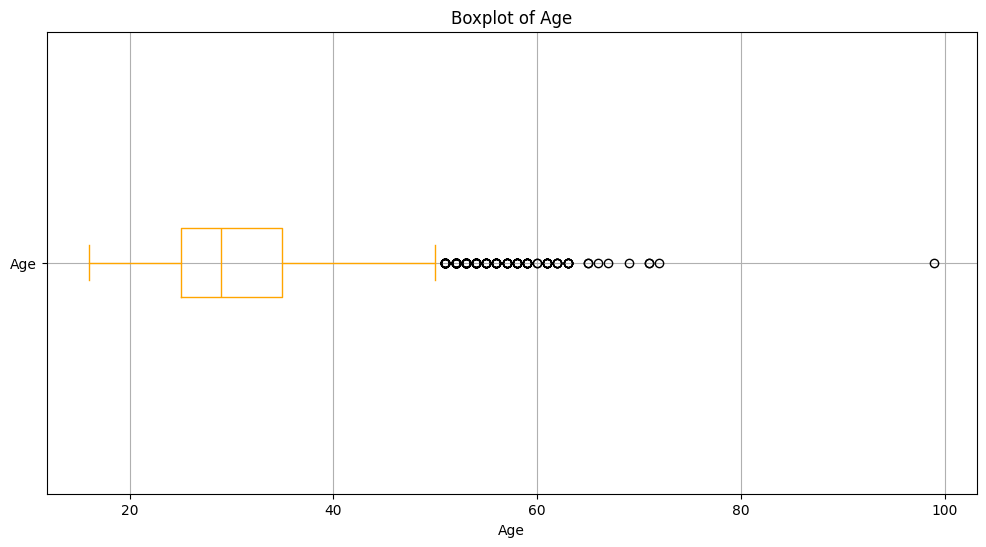

In [16]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.boxplot(figsize=(12,6), column='Age', color='orange', vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


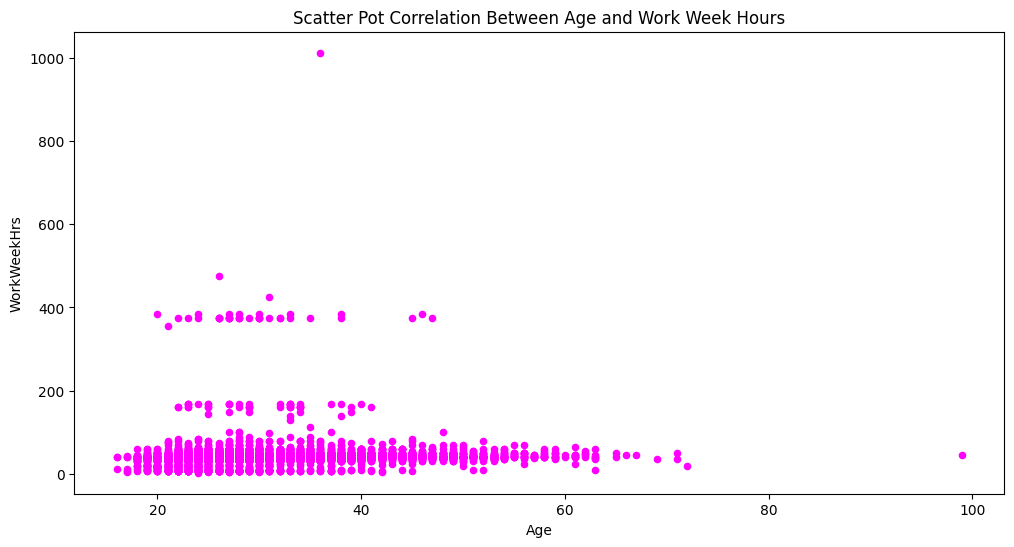

In [18]:
# create the query
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)
#create the plot 
df.plot(figsize=(12,6), x='Age', y='WorkWeekHrs', kind='scatter', color='magenta')
plt.title('Scatter Pot Correlation Between Age and Work Week Hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


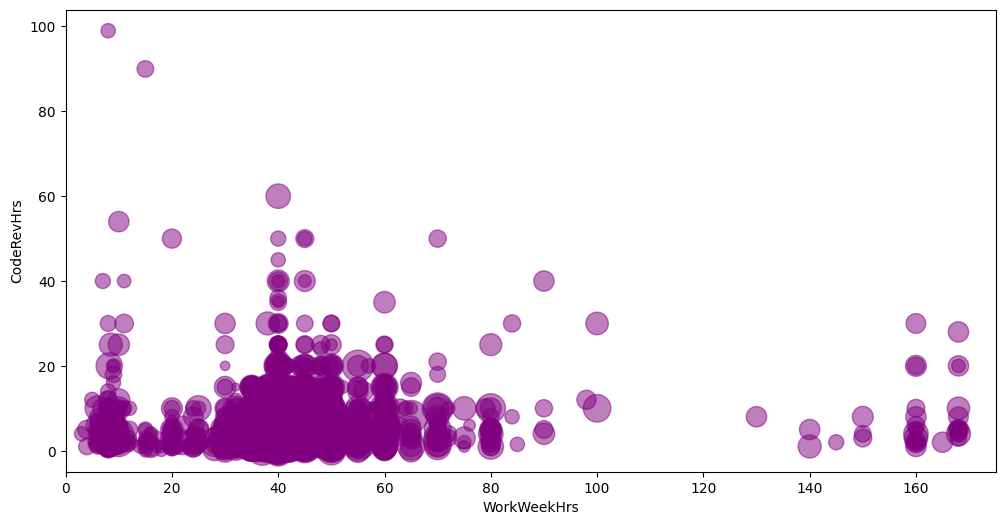

In [19]:
# create the query
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)

#normalize Age using featured scaling formula of X = ((x - x(min))/(x(max) - x(min)))
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

#plot the bubbleplot
df.plot(figsize=(12,6), x='WorkWeekHrs', y='CodeRevHrs', s=norm_age * 1000 + 10, kind='scatter', alpha=0.5, xlim=(0, 175), color='purple')
plt.title('Bubble Plot of ')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


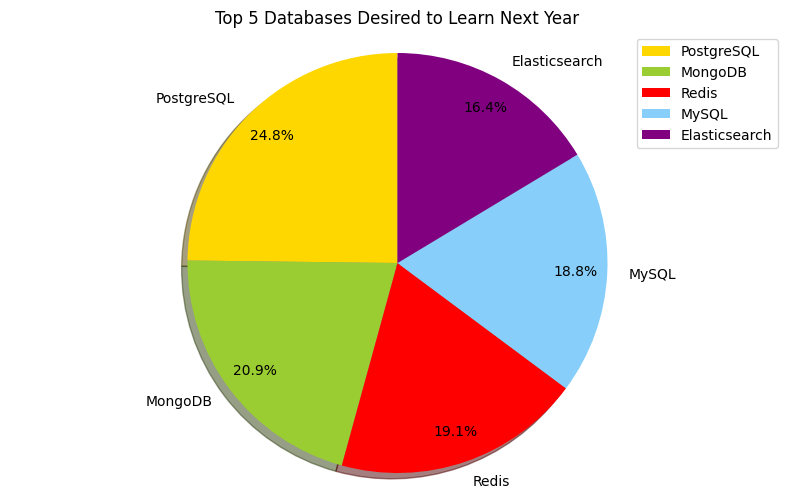

In [44]:
#create new database on LanguageDesireNextYear
table_name = 'DatabaseDesireNextYear'
QUERY="""
SELECT sql
FROM sqlite_master
WHERE name='{}'
""".format(table_name)

# create the query
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)

#Set index of the dataframe
df.set_index('DatabaseDesireNextYear', inplace=True)

#Define colors and labels for the pie chart
color_list = ['gold', 'yellowgreen', 'red', 'lightskyblue', 'purple', 'pink']
labels = df.index #Use the index as labels (rows)

#create the pie chart
plt.figure(figsize=(10,6)) 
plt.pie(df['Count'], labels=labels, colors=color_list, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=.85)
plt.title('Top 5 Databases Desired to Learn Next Year')
plt.axis('equal')

#add legend
plt.legend(labels, loc= 'upper right')

#show pie chart
plt.show()

In [45]:
# create the query
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""


#read the query into the dataframe
df3 = pd.read_sql_query(QUERY,conn)
print(df3)

  DatabaseDesireNextYear  Count
0             PostgreSQL   4328
1                MongoDB   3649
2                  Redis   3331
3                  MySQL   3281
4          Elasticsearch   2856


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


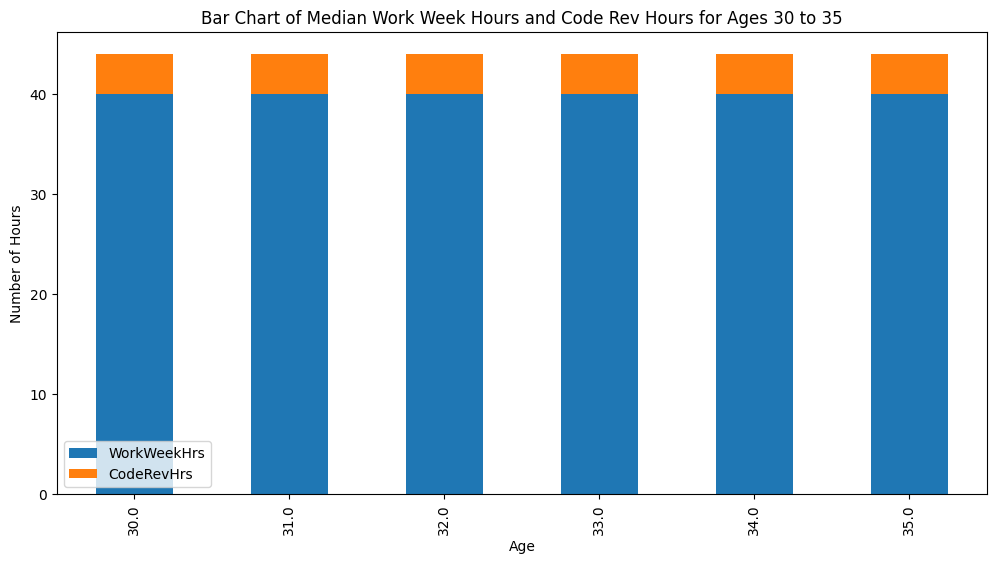

In [30]:
# create the query
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 and 35
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)

#group by age on the dataframe
df1 = df.groupby('Age').median()

#plot the bar chart
df1.plot(kind='bar', figsize=(12,6), stacked=True)
plt.title('Bar Chart of Median Work Week Hours and Code Rev Hours for Ages 30 to 35')
plt.xlabel('Age')
plt.ylabel('Number of Hours')
plt.legend(loc='lower left')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


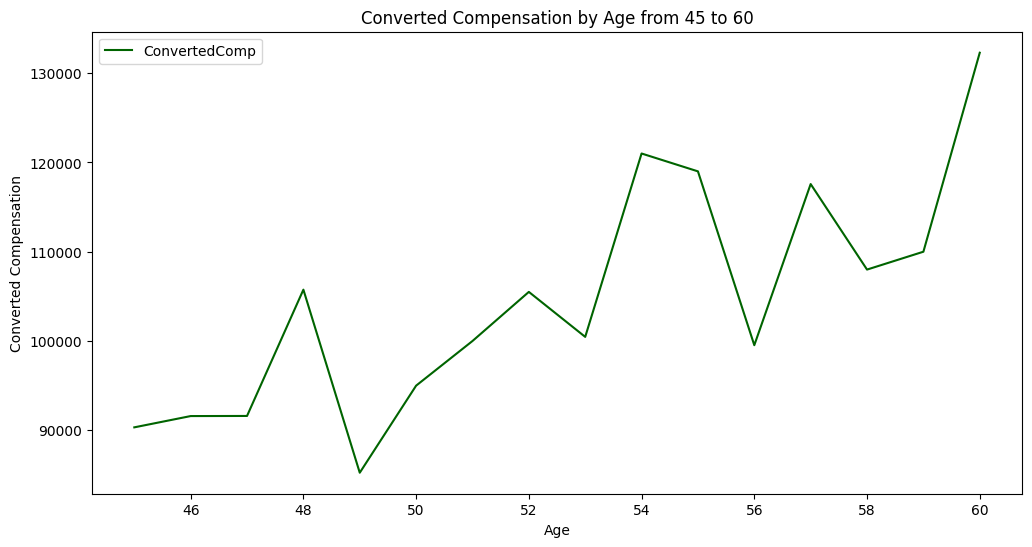

In [32]:
# create the query
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 and 60
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)
#group by age and apply the median to each group
df2 = df.groupby('Age').median()

#plot the line chart
df2.plot(kind='line', figsize=(12,6), color='darkgreen')
plt.title('Converted Compensation by Age from 45 to 60')
plt.xlabel('Age')
plt.ylabel('Converted Compensation')
plt.show()

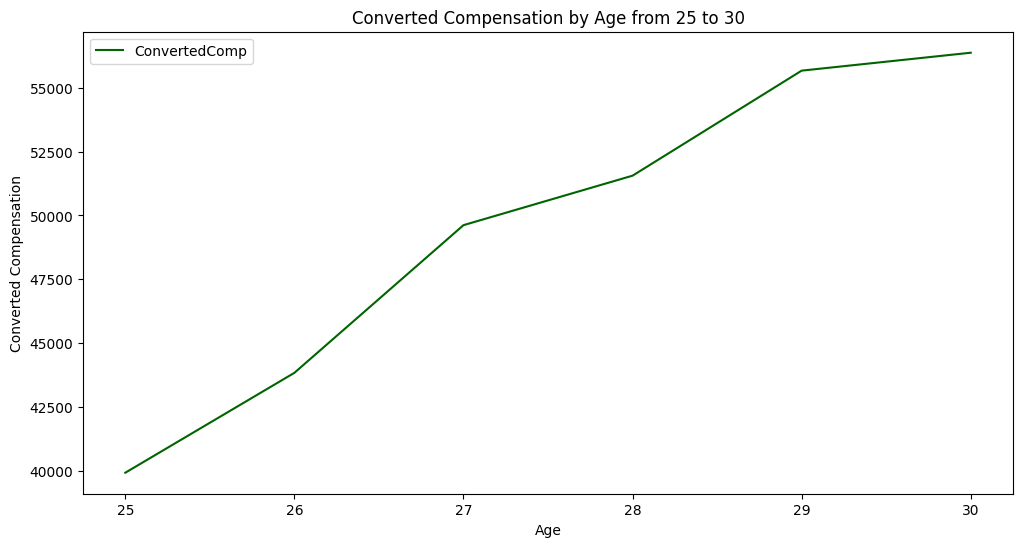

In [57]:
# create the query
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 and 30
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)
#group by age and apply the median to each group
df2 = df.groupby('Age').median()

#plot the line chart
df2.plot(kind='line', figsize=(12,6), color='darkgreen')
plt.title('Converted Compensation by Age from 25 to 30')
plt.xlabel('Age')
plt.ylabel('Converted Compensation')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


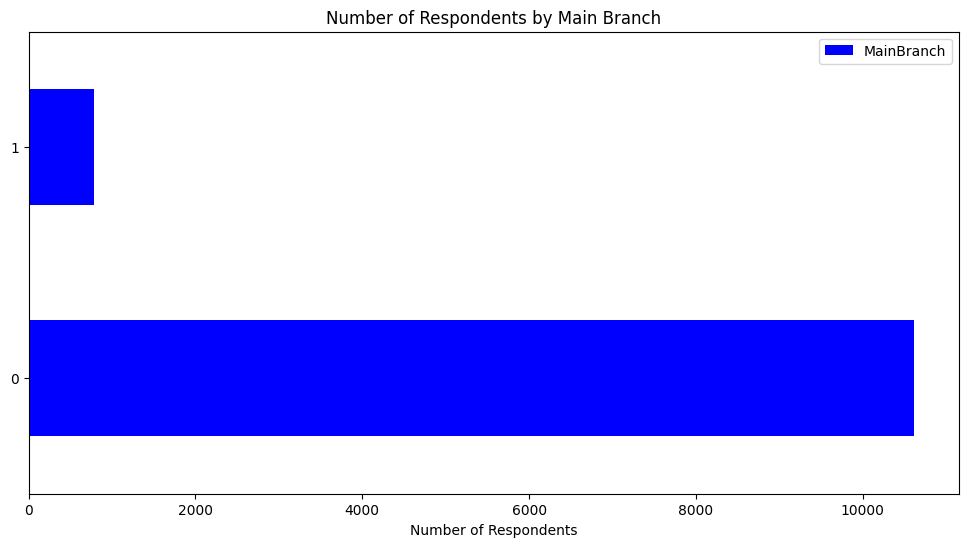

In [35]:
#create the query
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
FROM master
GROUP BY MainBranch
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)

#create horizontal bar chart
df.plot(kind='barh', figsize=(12,6), color='blue')
plt.title('Number of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.show()


In [59]:
#create the query
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
FROM master
GROUP BY MainBranch
"""
#read the query into the dataframe
df = pd.read_sql_query(QUERY,conn)
print(df)

                                          MainBranch  MainBranch
0                     I am a developer by profession       10618
1  I am not primarily a developer, but I write co...         780


Close the database connection.


In [60]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
